In [2]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV 
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.decomposition import PCA
from matplotlib.image import imread
import numpy as np
from sklearn.pipeline import make_pipeline
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [11]:
# Que es validacion cruzada?
# Respuesta: 


  Using cached statsmodels-0.14.0-cp311-cp311-win_amd64.whl (9.2 MB)


In [9]:
df = pd.read_csv("Employee Attrition.csv")
#df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.drop(["Emp ID", "dept", "salary"], axis=1, inplace=True)

In [10]:
#Elima las filas que contengan valores nulos
df.dropna(inplace=True)

In [11]:
df.shape

(14999, 7)

In [12]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0


In [46]:
df["dept"].value_counts()

dept
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [25]:
print(df.describe())


             Emp ID  satisfaction_level  last_evaluation  number_project   
count  14999.000000        14999.000000     14999.000000    14999.000000  \
mean    7500.000000            0.612834         0.716102        3.803054   
std     4329.982679            0.248631         0.171169        1.232592   
min        1.000000            0.090000         0.360000        2.000000   
25%     3750.500000            0.440000         0.560000        3.000000   
50%     7500.000000            0.640000         0.720000        4.000000   
75%    11249.500000            0.820000         0.870000        5.000000   
max    14999.000000            1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident   
count          14999.000000        14999.000000   14999.000000  \
mean             201.050337            3.498233       0.144610   
std               49.943099            1.460136       0.351719   
min               96.000000            2.000000    

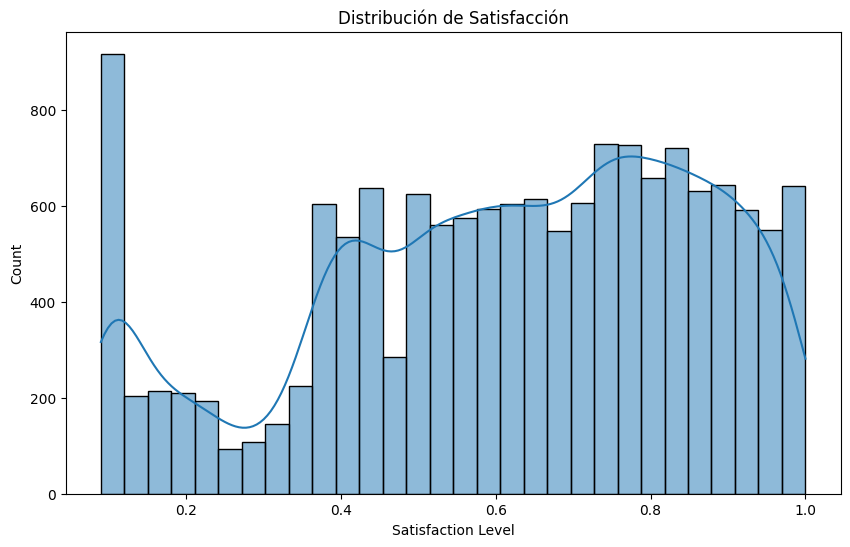

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['satisfaction_level'], bins=30, kde=True)
plt.xlabel('Satisfaction Level')
plt.title('Distribución de Satisfacción')
plt.show()



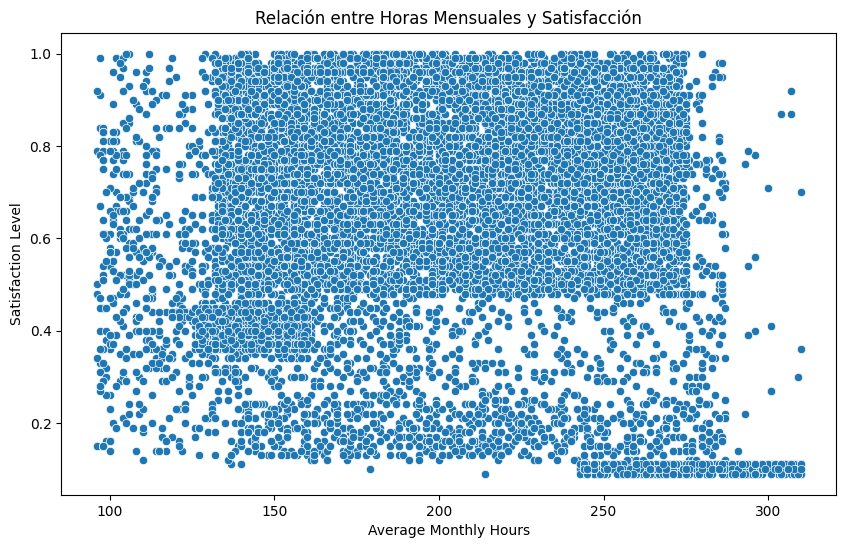

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_montly_hours', y='satisfaction_level', data=df)
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.title('Relación entre Horas Mensuales y Satisfacción')
plt.show()

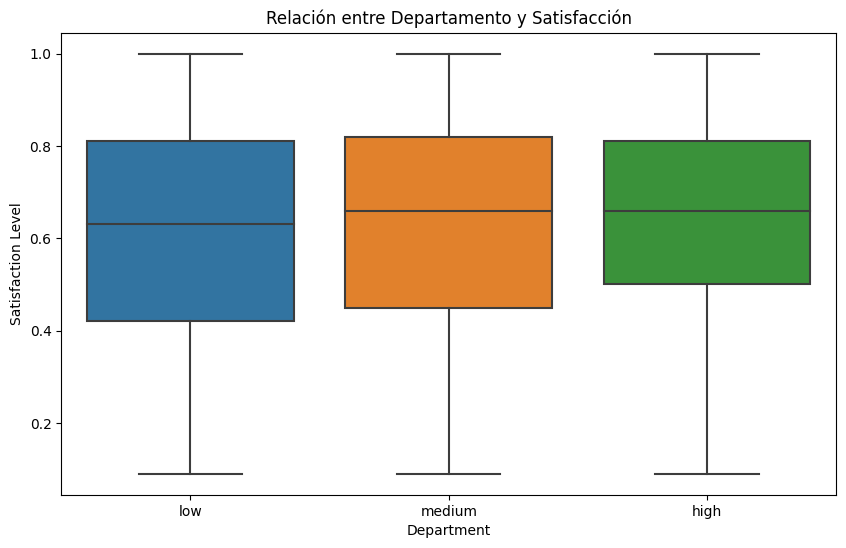

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='salary', y='satisfaction_level', data=df)
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
plt.title('Relación entre Departamento y Satisfacción')
plt.show()


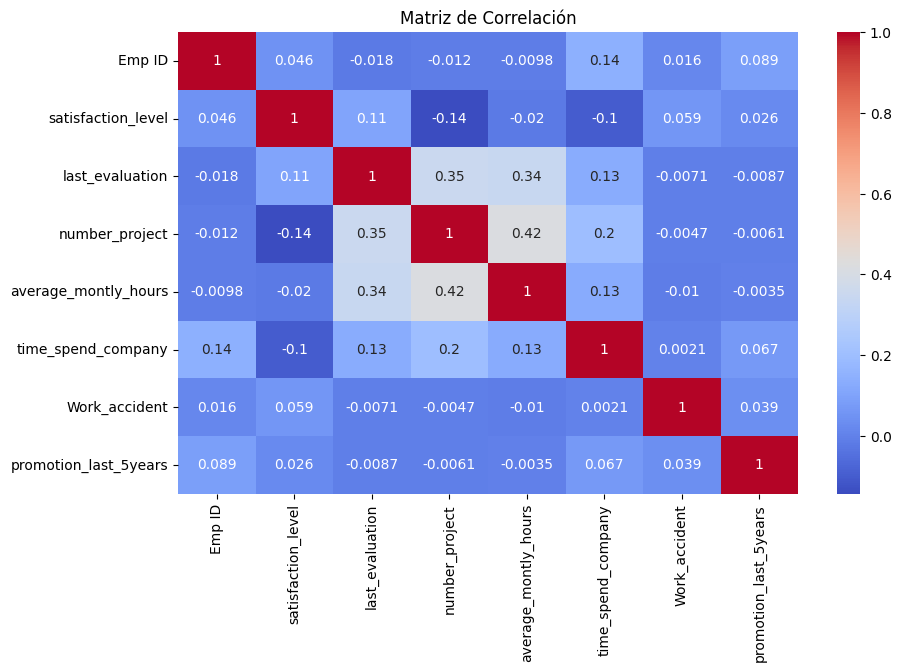

In [32]:
df2 = df.drop(["dept", "salary"], axis=1, inplace=True)
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [51]:
regression_model = LinearRegression()

In [61]:
X = df[["last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "promotion_last_5years"]]
y = df["satisfaction_level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = regression_model.predict(X_test)

In [66]:
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 0.057542051793827605
R^2: 0.058293804142913186


In [67]:
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)


In [68]:
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elasticnet_model.fit(X_train, y_train)


ElasticNet()

In [70]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

lasso_model = Lasso()
lasso_grid = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

elasticnet_model = ElasticNet()
elasticnet_grid = GridSearchCV(elasticnet_model, param_grid, cv=5, scoring='neg_mean_squared_error')
elasticnet_grid.fit(X_train, y_train)

best_alpha_ridge = ridge_grid.best_params_['alpha']
best_alpha_lasso = lasso_grid.best_params_['alpha']
best_alpha_elasticnet = elasticnet_grid.best_params_['alpha']

final_ridge_model = Ridge(alpha=best_alpha_ridge)
final_ridge_model.fit(X_train, y_train)

final_lasso_model = Lasso(alpha=best_alpha_lasso)
final_lasso_model.fit(X_train, y_train)

final_elasticnet_model = ElasticNet(alpha=best_alpha_elasticnet)
final_elasticnet_model.fit(X_train, y_train)

ridge_mse = mean_squared_error(y_test, final_ridge_model.predict(X_test))
lasso_mse = mean_squared_error(y_test, final_lasso_model.predict(X_test))
elasticnet_mse = mean_squared_error(y_test, final_elasticnet_model.predict(X_test))

print("MSE Ridge:", ridge_mse)
print("MSE Lasso:", lasso_mse)
print("MSE Elastic Net:", elasticnet_mse)


MSE Ridge: 0.05754232036475548
MSE Lasso: 0.05942875267791129
MSE Elastic Net: 0.058821882341608005


In [71]:
X_train_const = sm.add_constant(X_train)

model_ols = sm.OLS(y_train, X_train_const).fit()

resultados = model_ols.summary()

In [72]:
print(resultados)

                            OLS Regression Results                            
Dep. Variable:     satisfaction_level   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     127.1
Date:                Sat, 04 Nov 2023   Prob (F-statistic):          1.77e-156
Time:                        02:34:15   Log-Likelihood:                 27.353
No. Observations:               11999   AIC:                            -40.71
Df Residuals:                   11992   BIC:                             11.04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.60